In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 

In [266]:
data = pd.read_csv("/media/radial/Work/Work/Work on datasets/Dc crimes/dc_crime_add_vars.csv")
data.head()

Unnamed: 0  X           REPORT_DAT    SHIFT              OFFENSE  METHOD  \
0           1  1  2008-05-08 15:59:59  EVENING              ROBBERY  OTHERS   
1           2  2  2008-05-08 16:17:00  EVENING              ROBBERY     GUN   
2           3  3  2008-05-08 17:29:59  EVENING  MOTOR VEHICLE THEFT  OTHERS   
3           4  4  2008-05-08 18:06:00  EVENING             BURGLARY  OTHERS   
4           5  5  2008-05-08 20:15:00  EVENING          THEFT/OTHER  OTHERS   

                                      BLOCK  DISTRICT    PSA  WARD  \
0            Q STREET SE AND 17TH STREET SE       6.0  607.0     8   
1   1900 2199  BLOCK OF SAVANNAH TERRACE SE       7.0  704.0     8   
2  4037 4199  BLOCK OF SOUTH CAPITOL STREET       7.0  708.0     8   
3        700 - 799 BLOCK OF UPSAL STREET SE       7.0  705.0     8   
4        3400 - 3699 BLOCK OF 4TH STREET SE       7.0  707.0     8   

      ...       year month day  hour minute  second    EW     NS       quad  \
0     ...       2008     5   8    15     59      59  East  South  Southeast   
1     ...       2008     5   8    16     17       0  East  South  Southeast   
2     ...       2008     5   8    17     29      59  East  South  Southeast   
3     ...       2008     5   8    18      6       0  East  South  Southeast   
4     ...       2008     5   8    20     15       0  East  South  Southeast   

     crimetype  
0      Violent  
1      Violent  
2  Non-Violent  
3  Non-Violent  
4  Non-Violent  

[5 rows x 32 columns]

In [267]:
data.columns

Index(['Unnamed: 0', 'X', 'REPORT_DAT', 'SHIFT', 'OFFENSE', 'METHOD', 'BLOCK',
       'DISTRICT', 'PSA', 'WARD', 'ANC', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP',
       'CENSUS_TRACT', 'VOTING_PRECINCT', 'CCN', 'START_DATE', 'END_DATE',
       'XBLOCK', 'YBLOCK', 'optional', 'date', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'EW', 'NS', 'quad', 'crimetype'],
      dtype='object')

In [268]:
data.drop("Unnamed: 0", axis =1, inplace=True)

In [269]:
data.head()

X           REPORT_DAT    SHIFT              OFFENSE  METHOD  \
0  1  2008-05-08 15:59:59  EVENING              ROBBERY  OTHERS   
1  2  2008-05-08 16:17:00  EVENING              ROBBERY     GUN   
2  3  2008-05-08 17:29:59  EVENING  MOTOR VEHICLE THEFT  OTHERS   
3  4  2008-05-08 18:06:00  EVENING             BURGLARY  OTHERS   
4  5  2008-05-08 20:15:00  EVENING          THEFT/OTHER  OTHERS   

                                      BLOCK  DISTRICT    PSA  WARD ANC  \
0            Q STREET SE AND 17TH STREET SE       6.0  607.0     8  8A   
1   1900 2199  BLOCK OF SAVANNAH TERRACE SE       7.0  704.0     8  8E   
2  4037 4199  BLOCK OF SOUTH CAPITOL STREET       7.0  708.0     8  8D   
3        700 - 799 BLOCK OF UPSAL STREET SE       7.0  705.0     8  8C   
4        3400 - 3699 BLOCK OF 4TH STREET SE       7.0  707.0     8  8C   

      ...       year month  day hour  minute second    EW     NS       quad  \
0     ...       2008     5    8   15      59     59  East  South  Southeast   
1     ...       2008     5    8   16      17      0  East  South  Southeast   
2     ...       2008     5    8   17      29     59  East  South  Southeast   
3     ...       2008     5    8   18       6      0  East  South  Southeast   
4     ...       2008     5    8   20      15      0  East  South  Southeast   

     crimetype  
0      Violent  
1      Violent  
2  Non-Violent  
3  Non-Violent  
4  Non-Violent  

[5 rows x 31 columns]

In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320191 entries, 0 to 320190
Data columns (total 31 columns):
X                       320191 non-null int64
REPORT_DAT              320191 non-null object
SHIFT                   320191 non-null object
OFFENSE                 320191 non-null object
METHOD                  320191 non-null object
BLOCK                   320191 non-null object
DISTRICT                319994 non-null float64
PSA                     319946 non-null float64
WARD                    320191 non-null int64
ANC                     320191 non-null object
NEIGHBORHOOD_CLUSTER    315738 non-null object
BLOCK_GROUP             319153 non-null object
CENSUS_TRACT            319153 non-null float64
VOTING_PRECINCT         320107 non-null object
CCN                     320191 non-null int64
START_DATE              320177 non-null object
END_DATE                309425 non-null object
XBLOCK                  320191 non-null float64
YBLOCK                  320191 non-null fl

In [271]:
data.describe()

X       DISTRICT            PSA           WARD  \
count  320191.000000  319994.000000  319946.000000  320191.000000   
mean   160096.000000       3.731739     378.567108       4.449566   
std     92431.324359       1.978984     197.465368       2.382272   
min         1.000000       1.000000     101.000000       1.000000   
25%     80048.500000       2.000000     206.000000       2.000000   
50%    160096.000000       4.000000     401.000000       5.000000   
75%    240143.500000       5.000000     507.000000       6.000000   
max    320191.000000       7.000000     708.000000       8.000000   

        CENSUS_TRACT           CCN         XBLOCK         YBLOCK  \
count  319153.000000  3.201910e+05  320191.000000  320191.000000   
mean     6217.183442  1.234703e+07     -77.008187      38.905924   
std      3137.762518  2.691006e+06       0.036305       0.031685   
min       100.000000  1.000600e+05     -77.113642      38.813471   
25%      3500.000000  1.009342e+07     -77.032590      38.890925   
50%      7000.000000  1.215914e+07     -77.013255      38.906430   
75%      8904.000000  1.440402e+07     -76.985586      38.925396   
max     11100.000000  9.943899e+07     -76.910012      38.994901   

                year          month            day           hour  \
count  320191.000000  320191.000000  320191.000000  320191.000000   
mean     2012.239398       6.620164      15.956848      13.177419   
std         2.653736       3.387144       8.758315       6.232725   
min      2008.000000       1.000000       1.000000       0.000000   
25%      2010.000000       4.000000       8.000000       9.000000   
50%      2012.000000       7.000000      16.000000      14.000000   
75%      2014.000000      10.000000      23.000000      18.000000   
max      2017.000000      12.000000      31.000000      23.000000   

              minute         second  
count  320191.000000  320191.000000  
mean       28.503346      20.713062  
std        18.434182      26.312724  
min         0.000000       0.000000  
25%        13.000000       0.000000  
50%        29.000000       0.000000  
75%        44.000000      59.000000  
max        59.000000      59.000000

In [272]:
subdata = data[["X","REPORT_DAT","SHIFT","OFFENSE","METHOD","BLOCK","DISTRICT",'PSA','WARD','ANC','NEIGHBORHOOD_CLUSTER',"CCN","START_DATE","END_DATE","optional","date","year","month","day","hour","EW","NS","quad","crimetype"]]

In [273]:
subdata.head()

X           REPORT_DAT    SHIFT              OFFENSE  METHOD  \
0  1  2008-05-08 15:59:59  EVENING              ROBBERY  OTHERS   
1  2  2008-05-08 16:17:00  EVENING              ROBBERY     GUN   
2  3  2008-05-08 17:29:59  EVENING  MOTOR VEHICLE THEFT  OTHERS   
3  4  2008-05-08 18:06:00  EVENING             BURGLARY  OTHERS   
4  5  2008-05-08 20:15:00  EVENING          THEFT/OTHER  OTHERS   

                                      BLOCK  DISTRICT    PSA  WARD ANC  \
0            Q STREET SE AND 17TH STREET SE       6.0  607.0     8  8A   
1   1900 2199  BLOCK OF SAVANNAH TERRACE SE       7.0  704.0     8  8E   
2  4037 4199  BLOCK OF SOUTH CAPITOL STREET       7.0  708.0     8  8D   
3        700 - 799 BLOCK OF UPSAL STREET SE       7.0  705.0     8  8C   
4        3400 - 3699 BLOCK OF 4TH STREET SE       7.0  707.0     8  8C   

      ...      optional                 date  year month day hour    EW  \
0     ...          True  2008-05-08 15:59:59  2008     5   8   15  East   
1     ...          True  2008-05-08 16:17:00  2008     5   8   16  East   
2     ...          True  2008-05-08 17:29:59  2008     5   8   17  East   
3     ...          True  2008-05-08 18:06:00  2008     5   8   18  East   
4     ...          True  2008-05-08 20:15:00  2008     5   8   20  East   

      NS       quad    crimetype  
0  South  Southeast      Violent  
1  South  Southeast      Violent  
2  South  Southeast  Non-Violent  
3  South  Southeast  Non-Violent  
4  South  Southeast  Non-Violent  

[5 rows x 24 columns]

In [274]:
s = 0
for i in range(len(subdata.date)):
    if ((subdata.REPORT_DAT[i] == subdata.date[i])==True):
        s = s+1
s

320191

In [275]:
subdata.shape

(320191, 24)

In [276]:
subdata.drop("date", axis =1, inplace=True)

/home/radial/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [277]:
subdata.shape

(320191, 23)

In [278]:
subdata.SHIFT.value_counts()

EVENING     136275
DAY         123014
MIDNIGHT     60902
Name: SHIFT, dtype: int64

In [279]:
subdata.METHOD.value_counts()

OTHERS    289374
GUN        20105
KNIFE      10712
Name: METHOD, dtype: int64

In [280]:
subdata.DISTRICT.value_counts()

1.0    54298
3.0    53575
2.0    50826
5.0    42195
4.0    42111
6.0    40883
7.0    36106
Name: DISTRICT, dtype: int64

In [281]:
subdata.WARD.value_counts()

2    58200
6    49263
1    45873
5    41821
7    39736
8    38906
4    29179
3    17213
Name: WARD, dtype: int64

In [282]:
subdata.NEIGHBORHOOD_CLUSTER.value_counts()

Cluster 2     26203
Cluster 8     21122
Cluster 6     18444
Cluster 25    17349
Cluster 18    15172
Cluster 39    15119
Cluster 26    14912
Cluster 3     13054
Cluster 23    11672
Cluster 21    11380
Cluster 7     10673
Cluster 22    10202
Cluster 31     8945
Cluster 33     8886
Cluster 4      8833
Cluster 17     8748
Cluster 1      8425
Cluster 32     7914
Cluster 34     7707
Cluster 38     6506
Cluster 11     5527
Cluster 9      5257
Cluster 5      5113
Cluster 37     4745
Cluster 30     4396
Cluster 19     4064
Cluster 24     3866
Cluster 28     3855
Cluster 20     3804
Cluster 15     3554
Cluster 36     3498
Cluster 35     3053
Cluster 14     2709
Cluster 10     2616
Cluster 13     2023
Cluster 12     1900
Cluster 27     1749
Cluster 16     1737
Cluster 29     1006
Name: NEIGHBORHOOD_CLUSTER, dtype: int64

In [283]:
subdata.optional.value_counts()

True    320191
Name: optional, dtype: int64

In [284]:
subdata.drop("optional",axis =1,inplace = True)

/home/radial/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [285]:
subdata.year.value_counts()

2014    38447
2015    36603
2013    35917
2012    35382
2016    35065
2008    34206
2011    33570
2010    31594
2009    31210
2017     8197
Name: year, dtype: int64

In [286]:
subdata.ANC.value_counts()

2B    18312
1B    17927
1A    16937
2C    13228
6B    13177
5C    11319
5E    10923
2F    10577
6A    10475
6C    10345
5D    10217
4C     9190
7C     8906
8C     8873
2E     8855
6E     8621
7F     8275
7D     8148
8B     7815
1C     7654
8A     7651
4B     7562
7B     7485
8E     7287
8D     7280
7E     6941
4A     6940
6D     6804
2A     6136
5B     5567
3E     5223
4D     4326
3C     4248
5A     3606
1D     3309
3G     2492
3F     2427
3D     2397
3B     1540
2D     1196
Name: ANC, dtype: int64

In [287]:
subdata.day.value_counts()

23    11101
28    10987
21    10952
22    10943
20    10929
18    10919
24    10772
17    10748
19    10713
27    10666
26    10658
15    10613
9     10608
16    10551
13    10479
14    10395
25    10392
12    10335
5     10306
8     10293
10    10264
7     10258
6     10166
29    10129
11    10106
4     10090
1     10054
3      9933
30     9866
2      9788
31     6177
Name: day, dtype: int64

In [288]:
subdata.month.value_counts()

7     29375
10    29003
8     28916
6     27999
9     27757
5     27499
1     26630
11    26007
12    25642
3     24869
4     24713
2     21781
Name: month, dtype: int64

In [289]:
subdata.EW.value_counts()

East    257673
West     62518
Name: EW, dtype: int64

In [290]:
subdata.NS.value_counts()

North    243486
South     76705
Name: NS, dtype: int64

In [291]:
subdata.quad.value_counts()

Northeast    180979
Southeast     76694
Northwest     62507
Southwest        11
Name: quad, dtype: int64

In [292]:
subdata.crimetype.value_counts()

Non-Violent    260460
Violent         59731
Name: crimetype, dtype: int64

In [293]:
subdata.isnull().sum()

X                           0
REPORT_DAT                  0
SHIFT                       0
OFFENSE                     0
METHOD                      0
BLOCK                       0
DISTRICT                  197
PSA                       245
WARD                        0
ANC                         0
NEIGHBORHOOD_CLUSTER     4453
CCN                         0
START_DATE                 14
END_DATE                10766
year                        0
month                       0
day                         0
hour                        0
EW                          0
NS                          0
quad                        0
crimetype                   0
dtype: int64

In [294]:
subdata.iloc[64155,13]

nan

(array([ 29775.,  30562.,  31159.,  30705.,  31487.,  32218.,  32594.,
         32816.,  31716.,  37159.]),
 array([  1.,   4.,   7.,  10.,  13.,  16.,  19.,  22.,  25.,  28.,  31.]),
 <a list of 10 Patch objects>)

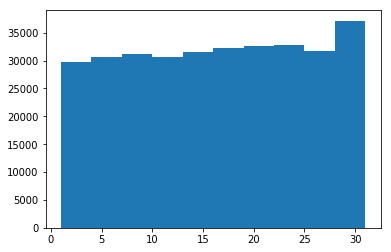

In [295]:
plt.hist(subdata.day)

(array([ 48411.,  24869.,  24713.,  27499.,  27999.,  29375.,  28916.,
         27757.,  29003.,  51649.]),
 array([  1. ,   2.1,   3.2,   4.3,   5.4,   6.5,   7.6,   8.7,   9.8,
         10.9,  12. ]),
 <a list of 10 Patch objects>)

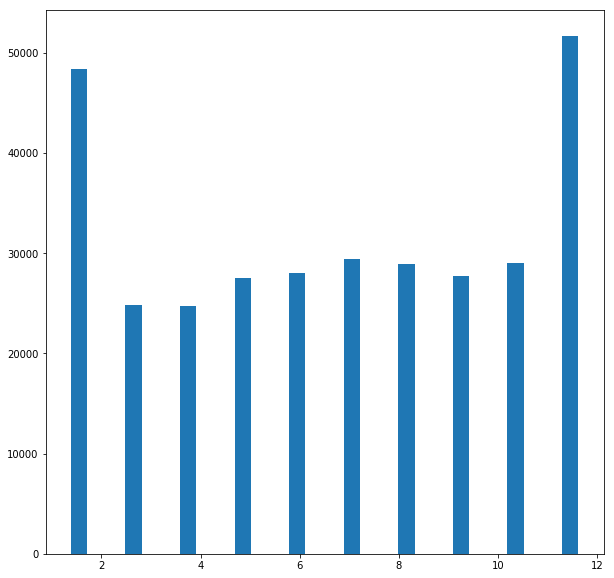

In [296]:
plt.figure(figsize=(10,10))
plt.hist(subdata.month, rwidth= 0.3)

(array([ 26148.,  13706.,  10860.,  36286.,  30803.,  36263.,  54443.,
         38865.,  31930.,  40887.]),
 array([  0. ,   2.3,   4.6,   6.9,   9.2,  11.5,  13.8,  16.1,  18.4,
         20.7,  23. ]),
 <a list of 10 Patch objects>)

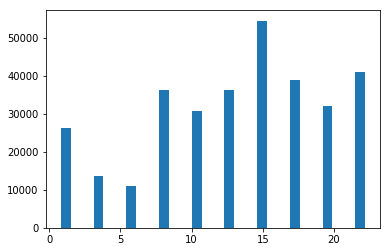

In [297]:
plt.hist(subdata.hour, rwidth= 0.3)

In [298]:
subdata.SHIFT.value_counts()

EVENING     136275
DAY         123014
MIDNIGHT     60902
Name: SHIFT, dtype: int64

In [299]:
#plt.hist(subdata.OFFENSE)
subdata.OFFENSE.value_counts()

THEFT/OTHER                   120980
THEFT F/AUTO                   77458
ROBBERY                        33972
MOTOR VEHICLE THEFT            31282
BURGLARY                       30417
ASSAULT W/DANGEROUS WEAPON     22375
SEX ABUSE                       2214
HOMICIDE                        1170
ARSON                            323
Name: OFFENSE, dtype: int64

In [300]:
sub_offense = pd.DataFrame(data=subdata,columns=["OFFENSE","METHOD","DISTRICT","hour","day","month"])
sub_offense.head()

OFFENSE  METHOD  DISTRICT  hour  day  month
0              ROBBERY  OTHERS       6.0    15    8      5
1              ROBBERY     GUN       7.0    16    8      5
2  MOTOR VEHICLE THEFT  OTHERS       7.0    17    8      5
3             BURGLARY  OTHERS       7.0    18    8      5
4          THEFT/OTHER  OTHERS       7.0    20    8      5

In [301]:
data.head()

X           REPORT_DAT    SHIFT              OFFENSE  METHOD  \
0  1  2008-05-08 15:59:59  EVENING              ROBBERY  OTHERS   
1  2  2008-05-08 16:17:00  EVENING              ROBBERY     GUN   
2  3  2008-05-08 17:29:59  EVENING  MOTOR VEHICLE THEFT  OTHERS   
3  4  2008-05-08 18:06:00  EVENING             BURGLARY  OTHERS   
4  5  2008-05-08 20:15:00  EVENING          THEFT/OTHER  OTHERS   

                                      BLOCK  DISTRICT    PSA  WARD ANC  \
0            Q STREET SE AND 17TH STREET SE       6.0  607.0     8  8A   
1   1900 2199  BLOCK OF SAVANNAH TERRACE SE       7.0  704.0     8  8E   
2  4037 4199  BLOCK OF SOUTH CAPITOL STREET       7.0  708.0     8  8D   
3        700 - 799 BLOCK OF UPSAL STREET SE       7.0  705.0     8  8C   
4        3400 - 3699 BLOCK OF 4TH STREET SE       7.0  707.0     8  8C   

      ...       year month  day hour  minute second    EW     NS       quad  \
0     ...       2008     5    8   15      59     59  East  South  Southeast   
1     ...       2008     5    8   16      17      0  East  South  Southeast   
2     ...       2008     5    8   17      29     59  East  South  Southeast   
3     ...       2008     5    8   18       6      0  East  South  Southeast   
4     ...       2008     5    8   20      15      0  East  South  Southeast   

     crimetype  
0      Violent  
1      Violent  
2  Non-Violent  
3  Non-Violent  
4  Non-Violent  

[5 rows x 31 columns]

In [302]:
data.date.head()

0    2008-05-08 15:59:59
1    2008-05-08 16:17:00
2    2008-05-08 17:29:59
3    2008-05-08 18:06:00
4    2008-05-08 20:15:00
Name: date, dtype: object

In [303]:
from datetime import datetime
date = []
for i in data.date:
    date.append(datetime.strptime(i, "%Y-%m-%d %H:%M:%S"))
date

[datetime.datetime(2008, 5, 8, 15, 59, 59),
 datetime.datetime(2008, 5, 8, 16, 17),
 datetime.datetime(2008, 5, 8, 17, 29, 59),
 datetime.datetime(2008, 5, 8, 18, 6),
 datetime.datetime(2008, 5, 8, 20, 15),
 datetime.datetime(2008, 4, 16, 9, 0),
 datetime.datetime(2008, 3, 29, 5, 25),
 datetime.datetime(2008, 3, 29, 9, 56, 59),
 datetime.datetime(2008, 3, 29, 11, 58, 59),
 datetime.datetime(2008, 3, 29, 12, 35),
 datetime.datetime(2008, 3, 29, 15, 0),
 datetime.datetime(2008, 3, 29, 16, 30),
 datetime.datetime(2008, 4, 3, 0, 0),
 datetime.datetime(2008, 4, 4, 0, 23),
 datetime.datetime(2008, 4, 4, 0, 33, 59),
 datetime.datetime(2008, 4, 4, 1, 28),
 datetime.datetime(2008, 4, 4, 3, 59, 59),
 datetime.datetime(2008, 4, 4, 8, 29, 59),
 datetime.datetime(2008, 4, 4, 9, 0),
 datetime.datetime(2008, 4, 4, 9, 40),
 datetime.datetime(2008, 3, 12, 14, 29, 59),
 datetime.datetime(2008, 3, 21, 9, 30),
 datetime.datetime(2008, 3, 21, 10, 15),
 datetime.datetime(2008, 3, 21, 12, 56),
 datetime.date

In [304]:
day = []
for i in date:
    day.append(i.weekday())

(array([ 48364.,  46887.,      0.,  45505.,      0.,  44275.,  45855.,
             0.,  45297.,  44008.]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]),
 <a list of 10 Patch objects>)

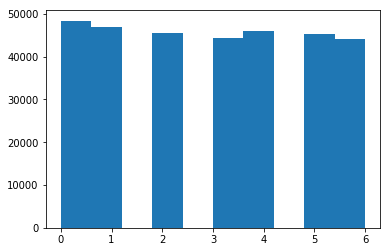

In [305]:
plt.hist(day)

In [306]:
?i.weekday()

In [307]:
data["Weekday"] = day

In [308]:
data.Weekday = data.Weekday.map({0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"})

In [309]:
s = 0
for i in data.index:
    if(data.day[i] == 25 and data.month[i] == 12):
        s = s+1
print("Crimes on Chirstmas between 2008-13: {}".format(s))

Crimes on Chirstmas between 2008-13: 454


In [310]:
s = 0
eve = [20,21,22,23,24]
for i in data.index:
    if(data.day[i] in eve and data.month[i] == 12):
        s = s+1
print("Crimes during Chirstmas eve between 2008-13: {}".format(s))

Crimes during Chirstmas eve between 2008-13: 4135


In [311]:
s = 0
for i in data.index:
    if((data.day[i] == 1 and data.month[i] == 1)or (data.day[i] == 31 and data.month[i] == 12)):
        s = s+1
print("Crimes on new year between 2008-13: {}".format(s))

Crimes on new year between 2008-13: 1553


In [312]:
s_13 =0
for i in data.index:
    if((data.year[i] == 2013)):
        s_13 = s_13+1
print("Crimes in 2013: {}".format(s_13))

Crimes in 2013: 35917


In [313]:
x = [2008,2009,2010,2011,2012,2013]
no_crime = []
for i in x:
    s = 0
    for j in data.index:
        if((data.year[j] == i)):
            s = s+1
    no_crime.append(s)

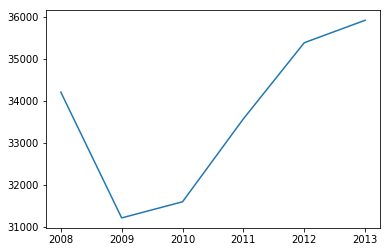

In [314]:
plt.plot(x,no_crime)

In [315]:
x = list([data.START_DATE,data.END_DATE])
x

[0         2008-05-08 15:00:00
 1         2008-05-03 21:00:00
 2         2008-05-08 13:15:00
 3         2008-05-08 09:00:00
 4         2008-05-08 16:34:59
 5         2008-04-16 06:59:59
 6         2008-03-29 05:22:00
 7         2008-03-29 04:30:00
 8         2008-03-28 21:59:59
 9         2008-03-28 18:30:00
 10        2008-03-29 14:00:00
 11        2008-03-27 21:59:59
 12        2008-04-03 17:51:59
 13        2008-04-04 00:00:00
 14        2008-04-03 17:45:00
 15        2008-04-03 22:30:00
 16        2008-04-04 02:10:00
 17        2008-04-03 21:00:00
 18        2008-04-03 20:00:00
 19        2008-04-04 00:30:00
 20        2008-03-12 12:59:59
 21        2008-03-20 08:15:00
 22        2008-03-14 18:00:00
 23        2008-03-21 00:30:00
 24        2008-03-21 15:24:59
 25        2008-02-01 13:28:59
 26        2008-03-29 16:50:00
 27        2008-03-29 10:50:00
 28        2008-04-05 21:10:00
 29        2008-04-05 18:10:00
                  ...         
 320161    2008-03-27 17:29:59
 320162 

In [316]:
date_start = []
for i in data.START_DATE:
    if (str(i)=="nan"):
        i = "2000-01-01 00:00:00"
        date_start.append(datetime.strptime(str(i), "%Y-%m-%d %H:%M:%S"))
    else:
        date_start.append(datetime.strptime(str(i), "%Y-%m-%d %H:%M:%S"))
len(date_start)

320191

In [317]:
date_end = []
for i in data.END_DATE:
     if (str(i)=="nan"):
        i = "2000-01-01 00:00:00"
        date_end.append(datetime.strptime(str(i), "%Y-%m-%d %H:%M:%S"))
     else:
        date_end.append(datetime.strptime(str(i), "%Y-%m-%d %H:%M:%S"))
len(date_end)

320191

In [318]:
diff=[]
for i in range(len(date_start)):
    diff.append(str(date_end[i]-date_start[i]))
diff

['0:01:00',
 '0:30:00',
 '0:35:00',
 '7:30:00',
 '3:25:01',
 '-1 day, 17:00:01',
 '0:03:00',
 '5:26:59',
 '10:30:00',
 '16:30:00',
 '-1 day, 10:00:00',
 '0:10:00',
 '-1 day, 6:08:01',
 '0:23:00',
 '-1 day, 6:15:00',
 '0:45:00',
 '-1 day, 21:50:00',
 '11:29:59',
 '10:59:59',
 '4:59:59',
 '-1 day, 11:00:01',
 '1 day, 0:00:00',
 '2 days, 15:30:00',
 '12:00:00',
 '-1 day, 8:35:01',
 '34 days, 22:46:00',
 '0:20:00',
 '3:39:59',
 '-1 day, 2:50:00',
 '-1 day, 5:50:00',
 '3:30:00',
 '7:15:00',
 '-1 day, 12:50:00',
 '-1 day, 5:30:00',
 '-1 day, 23:28:00',
 '15:30:00',
 '0:05:01',
 '-1 day, 9:38:00',
 '21:00:00',
 '-1 day, 8:00:01',
 '-1 day, 23:00:01',
 '-1 day, 0:50:00',
 '-1 day, 1:05:01',
 '-1 day, 6:00:00',
 '-1 day, 23:15:00',
 '10:59:59',
 '-1 day, 2:28:00',
 '-1 day, 23:45:01',
 '7:40:00',
 '9:14:59',
 '1 day, 1:13:01',
 '0:15:01',
 '-1 day, 12:30:01',
 '10:49:59',
 '-1 day, 2:15:00',
 '-1 day, 2:00:01',
 '0:02:00',
 '0:10:00',
 '7:55:00',
 '0:10:00',
 '0:51:00',
 '1:16:00',
 '15:30:01',

In [319]:
date_rep = []
for i in data.REPORT_DAT:
    if (str(i)=="nan"):
        i = "2000-01-01 00:00:00"
        date_rep.append(datetime.strptime(str(i), "%Y-%m-%d %H:%M:%S"))
    else:
        date_rep.append(datetime.strptime(str(i), "%Y-%m-%d %H:%M:%S"))
len(date_rep)

320191

In [320]:
diff_start=[]
for i in range(len(date_start)):
    diff_start.append(str(date_rep[i]-date_start[i]))
diff_start

['0:59:59',
 '4 days, 19:17:00',
 '4:14:59',
 '9:06:00',
 '3:40:01',
 '2:00:01',
 '0:03:00',
 '5:26:59',
 '13:59:00',
 '18:05:00',
 '1:00:00',
 '1 day, 18:30:01',
 '-1 day, 6:08:01',
 '0:23:00',
 '6:48:59',
 '2:58:00',
 '1:49:59',
 '11:29:59',
 '13:00:00',
 '9:10:00',
 '1:30:00',
 '1 day, 1:15:00',
 '6 days, 16:15:00',
 '12:26:00',
 '2:05:00',
 '49 days, 2:46:01',
 '0:49:59',
 '8:25:00',
 '1:10:00',
 '7:10:00',
 '2 days, 20:45:00',
 '8:45:00',
 '1:35:00',
 '0:29:59',
 '-1 day, 23:28:00',
 '20:29:59',
 '1:15:01',
 '1 day, 3:45:00',
 '23:56:00',
 '1 day, 3:00:00',
 '21:14:01',
 '0:45:00',
 '0:44:01',
 '6:45:00',
 '0:45:00',
 '17:44:59',
 '0:00:00',
 '1:15:01',
 '9:30:00',
 '9:59:59',
 '1 day, 1:15:01',
 '23:20:01',
 '1 day, 0:06:00',
 '12:09:00',
 '0:14:59',
 '1:30:00',
 '0:06:00',
 '0:20:00',
 '8:01:00',
 '3:33:00',
 '1:09:00',
 '3:10:00',
 '16:03:01',
 '1:21:00',
 '1:22:59',
 '4:50:01',
 '0:02:00',
 '0:01:00',
 '2:57:59',
 '0:03:59',
 '0:38:00',
 '1:37:00',
 '1:17:00',
 '1:14:00',
 '1:

In [321]:
diff_end=[]
for i in range(len(date_start)):
    diff_end.append(str(date_rep[i]-date_end[i]))
diff_end

['0:58:59',
 '4 days, 18:47:00',
 '3:39:59',
 '1:36:00',
 '0:15:00',
 '9:00:00',
 '0:00:00',
 '0:00:00',
 '3:29:00',
 '1:35:00',
 '15:00:00',
 '1 day, 18:20:01',
 '0:00:00',
 '0:00:00',
 '1 day, 0:33:59',
 '2:13:00',
 '3:59:59',
 '0:00:00',
 '2:00:01',
 '4:10:01',
 '14:29:59',
 '1:15:00',
 '4 days, 0:45:00',
 '0:26:00',
 '17:29:59',
 '14 days, 4:00:01',
 '0:29:59',
 '4:45:01',
 '22:20:00',
 '1 day, 1:20:00',
 '2 days, 17:15:00',
 '1:30:00',
 '12:45:00',
 '18:59:59',
 '0:00:00',
 '4:59:59',
 '1:10:00',
 '1 day, 18:07:00',
 '2:56:00',
 '1 day, 18:59:59',
 '22:14:00',
 '23:55:00',
 '23:39:00',
 '1 day, 0:45:00',
 '1:30:00',
 '6:45:00',
 '21:32:00',
 '1:30:00',
 '1:50:00',
 '0:45:00',
 '0:02:00',
 '23:05:00',
 '1 day, 11:35:59',
 '1:19:01',
 '21:59:59',
 '23:29:59',
 '0:04:00',
 '0:10:00',
 '0:06:00',
 '3:23:00',
 '0:18:00',
 '1:54:00',
 '0:33:00',
 '1:16:01',
 '1:20:00',
 '3:50:00',
 '0:01:01',
 '0:00:00',
 '0:48:00',
 '0:01:59',
 '0:23:00',
 '1:30:00',
 '0:01:59',
 '1:00:01',
 '1:26:00',

In [322]:
from collections import defaultdict
l = []
for i in range(len(diff_end)):
    l.append(len(diff_end[i]))
l

[7,
 16,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 15,
 7,
 7,
 14,
 7,
 7,
 7,
 7,
 7,
 8,
 7,
 15,
 7,
 8,
 16,
 7,
 7,
 8,
 14,
 16,
 7,
 8,
 8,
 7,
 7,
 7,
 15,
 7,
 15,
 8,
 8,
 8,
 14,
 7,
 7,
 8,
 7,
 7,
 7,
 7,
 8,
 15,
 7,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 14,
 15,
 7,
 7,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 7,
 7,
 16,
 8,
 7,
 7,
 7,
 7,
 7,
 14,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 7,
 8,
 7,
 7,
 7,
 7,
 15,
 7,
 7,
 7,
 15,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 7,
 7,
 17,
 7,
 7,
 8,
 8,
 7,
 7,
 7,
 8,
 7,
 7,
 7,
 14,
 7,
 7,
 7,
 15,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 14,
 8,
 7,
 14,
 14,
 14,
 14,
 15,
 7,
 8,
 7,
 7,
 8,
 7,
 7,
 8,
 14,
 8,
 8,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 7,
 7,
 8,
 7,
 7,
 7,
 16,
 7,
 8,
 7,
 7,
 8,
 8,
 15,
 7,
 7,
 7,
 7,
 8,
 15,
 7,
 8,
 7,
 8,
 8,
 7,
 8,
 7,
 7,
 16,
 7,
 7,
 8,
 15,
 7,
 7,
 7,
 17,
 7,
 7,
 16,
 7,
 7,
 8

In [323]:
lenght = defaultdict(int)
for time in l:
    lenght[time] += 1
lenght

defaultdict(int,
            {7: 248043,
             8: 22071,
             14: 6588,
             15: 11974,
             16: 16524,
             17: 3715,
             18: 4343,
             19: 6930,
             20: 2,
             21: 1})

In [324]:
t_728 = []
for i in diff_end:
    if ((len(i) ==7) and (i != "0:00:00")):
        i = "0"+i
        t_728.append((i,0))


In [325]:
t_728

[('00:58:59', 0),
 ('03:39:59', 0),
 ('01:36:00', 0),
 ('00:15:00', 0),
 ('09:00:00', 0),
 ('03:29:00', 0),
 ('01:35:00', 0),
 ('02:13:00', 0),
 ('03:59:59', 0),
 ('02:00:01', 0),
 ('04:10:01', 0),
 ('01:15:00', 0),
 ('00:26:00', 0),
 ('00:29:59', 0),
 ('04:45:01', 0),
 ('01:30:00', 0),
 ('04:59:59', 0),
 ('01:10:00', 0),
 ('02:56:00', 0),
 ('01:30:00', 0),
 ('06:45:00', 0),
 ('01:30:00', 0),
 ('01:50:00', 0),
 ('00:45:00', 0),
 ('00:02:00', 0),
 ('01:19:01', 0),
 ('00:04:00', 0),
 ('00:10:00', 0),
 ('00:06:00', 0),
 ('03:23:00', 0),
 ('00:18:00', 0),
 ('01:54:00', 0),
 ('00:33:00', 0),
 ('01:16:01', 0),
 ('01:20:00', 0),
 ('03:50:00', 0),
 ('00:01:01', 0),
 ('00:48:00', 0),
 ('00:01:59', 0),
 ('00:23:00', 0),
 ('01:30:00', 0),
 ('00:01:59', 0),
 ('01:00:01', 0),
 ('01:26:00', 0),
 ('00:04:59', 0),
 ('00:40:59', 0),
 ('00:32:59', 0),
 ('00:10:00', 0),
 ('02:00:00', 0),
 ('01:28:00', 0),
 ('00:14:00', 0),
 ('00:48:00', 0),
 ('00:07:01', 0),
 ('04:20:00', 0),
 ('00:01:00', 0),
 ('00:01:0

In [326]:
for i in diff_end:
    if ((len(i) ==8) and (i != "00:00:00")):
        t_728.append((i,0))

In [327]:
t_728

[('00:58:59', 0),
 ('03:39:59', 0),
 ('01:36:00', 0),
 ('00:15:00', 0),
 ('09:00:00', 0),
 ('03:29:00', 0),
 ('01:35:00', 0),
 ('02:13:00', 0),
 ('03:59:59', 0),
 ('02:00:01', 0),
 ('04:10:01', 0),
 ('01:15:00', 0),
 ('00:26:00', 0),
 ('00:29:59', 0),
 ('04:45:01', 0),
 ('01:30:00', 0),
 ('04:59:59', 0),
 ('01:10:00', 0),
 ('02:56:00', 0),
 ('01:30:00', 0),
 ('06:45:00', 0),
 ('01:30:00', 0),
 ('01:50:00', 0),
 ('00:45:00', 0),
 ('00:02:00', 0),
 ('01:19:01', 0),
 ('00:04:00', 0),
 ('00:10:00', 0),
 ('00:06:00', 0),
 ('03:23:00', 0),
 ('00:18:00', 0),
 ('01:54:00', 0),
 ('00:33:00', 0),
 ('01:16:01', 0),
 ('01:20:00', 0),
 ('03:50:00', 0),
 ('00:01:01', 0),
 ('00:48:00', 0),
 ('00:01:59', 0),
 ('00:23:00', 0),
 ('01:30:00', 0),
 ('00:01:59', 0),
 ('01:00:01', 0),
 ('01:26:00', 0),
 ('00:04:59', 0),
 ('00:40:59', 0),
 ('00:32:59', 0),
 ('00:10:00', 0),
 ('02:00:00', 0),
 ('01:28:00', 0),
 ('00:14:00', 0),
 ('00:48:00', 0),
 ('00:07:01', 0),
 ('04:20:00', 0),
 ('00:01:00', 0),
 ('00:01:0

In [328]:
t_12h = []
for i in diff_end:
    if ((len(i) ==14)):
        t_12h.append((i[7:],1))

In [329]:
t_12h

[('0:33:59', 1),
 ('1:20:00', 1),
 ('0:45:00', 1),
 ('4:26:00', 1),
 ('3:00:00', 1),
 ('2:28:00', 1),
 ('2:50:00', 1),
 ('0:17:00', 1),
 ('1:05:00', 1),
 ('3:30:00', 1),
 ('0:45:00', 1),
 ('1:54:59', 1),
 ('3:24:59', 1),
 ('4:20:00', 1),
 ('4:30:00', 1),
 ('5:15:00', 1),
 ('0:15:01', 1),
 ('2:10:00', 1),
 ('0:00:00', 1),
 ('1:09:59', 1),
 ('4:44:59', 1),
 ('3:14:59', 1),
 ('4:59:59', 1),
 ('0:11:01', 1),
 ('6:57:01', 1),
 ('5:29:59', 1),
 ('0:49:59', 1),
 ('1:15:00', 1),
 ('0:26:59', 1),
 ('3:41:01', 1),
 ('2:17:01', 1),
 ('1:40:00', 1),
 ('8:44:59', 1),
 ('3:15:00', 1),
 ('1:02:00', 1),
 ('0:10:00', 1),
 ('0:54:01', 1),
 ('3:22:00', 1),
 ('0:20:01', 1),
 ('3:59:59', 1),
 ('4:13:01', 1),
 ('8:03:01', 1),
 ('1:00:01', 1),
 ('2:03:59', 1),
 ('6:13:59', 1),
 ('0:42:00', 1),
 ('5:09:03', 1),
 ('5:45:10', 1),
 ('0:03:08', 1),
 ('4:44:37', 1),
 ('0:04:18', 1),
 ('1:00:01', 1),
 ('9:05:07', 1),
 ('0:20:24', 1),
 ('6:16:46', 1),
 ('2:25:12', 1),
 ('4:38:45', 1),
 ('5:04:21', 1),
 ('6:50:31', 1

In [330]:
r = []
for i in diff_end:
    if ((len(i) ==16)):
        i = i[:8]
        r.append(i.strip(" days,").strip(" day,"))

In [331]:
r

['4',
 '14',
 '2',
 '5',
 '5',
 '-1',
 '-1',
 '-1',
 '-1',
 '81',
 '2',
 '17',
 '3',
 '3',
 '-1',
 '59',
 '16',
 '2',
 '-1',
 '2',
 '4',
 '2',
 '8',
 '2',
 '2',
 '-1',
 '-1',
 '2',
 '6',
 '8',
 '19',
 '7',
 '3',
 '4',
 '7',
 '4',
 '-1',
 '3',
 '-1',
 '2',
 '37',
 '3',
 '-1',
 '3',
 '8',
 '-1',
 '-1',
 '17',
 '-1',
 '-1',
 '5',
 '2',
 '3',
 '2',
 '3',
 '41',
 '-1',
 '2',
 '-1',
 '5',
 '2',
 '6',
 '6',
 '11',
 '20',
 '2',
 '3',
 '-1',
 '10',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '4',
 '-1',
 '15',
 '6',
 '5',
 '-1',
 '3',
 '48',
 '4',
 '14',
 '-1',
 '3',
 '3',
 '2',
 '-1',
 '58',
 '6',
 '3',
 '-1',
 '7',
 '50',
 '4',
 '14',
 '2',
 '9',
 '45',
 '3',
 '6',
 '42',
 '7',
 '12',
 '-1',
 '3',
 '4',
 '6',
 '2',
 '78',
 '5',
 '7',
 '-1',
 '27',
 '11',
 '32',
 '4',
 '11',
 '4',
 '-1',
 '-1',
 '12',
 '2',
 '-1',
 '16',
 '-1',
 '2',
 '-1',
 '10',
 '3',
 '-1',
 '4',
 '-1',
 '2',
 '4',
 '-1',
 '-1',
 '16',
 '14',
 '5',
 '-1',
 '52',
 '4',
 '-1',
 '2',
 '5',
 '6',
 '6'

In [332]:
    t_12h = []
    t = []
    for i in diff_end:
        if ((len(i) ==16)):
            i = i[-8:]
            t.append(i.strip(" "))

In [333]:
t

['18:47:00',
 '4:00:01',
 '17:15:00',
 '22:20:00',
 '14:04:01',
 '23:44:59',
 '23:54:59',
 '23:54:00',
 '23:20:00',
 '0:59:59',
 '17:02:00',
 '8:19:59',
 '15:11:59',
 '18:55:00',
 '22:15:00',
 '0:00:00',
 '3:30:00',
 '13:44:59',
 '23:50:00',
 '12:30:00',
 '16:24:59',
 '21:00:00',
 '12:00:00',
 '19:00:00',
 '21:38:00',
 '22:36:00',
 '19:29:00',
 '21:13:59',
 '23:36:00',
 '14:11:00',
 '0:01:00',
 '13:39:00',
 '11:00:00',
 '23:47:00',
 '12:49:59',
 '19:08:00',
 '23:22:00',
 '16:23:01',
 '11:41:00',
 '12:07:01',
 '0:34:01',
 '19:17:00',
 '16:40:00',
 '21:35:00',
 '10:27:59',
 '10:29:00',
 '13:20:59',
 '0:35:59',
 '22:52:00',
 '15:00:00',
 '18:24:59',
 '23:20:00',
 '23:51:59',
 '15:07:00',
 '11:38:59',
 '5:00:00',
 '20:16:01',
 '22:50:01',
 '14:58:01',
 '15:08:00',
 '21:17:00',
 '21:27:00',
 '22:05:00',
 '9:23:00',
 '0:00:00',
 '10:07:00',
 '20:54:59',
 '23:04:00',
 '3:58:48',
 '23:39:01',
 '18:31:00',
 '19:55:19',
 '16:04:00',
 '22:57:01',
 '19:35:00',
 '22:24:00',
 '20:43:00',
 '23:08:00'

In [334]:
for i in range(len(t)):
    if (len(t[i])<8):
        t[i] = "0"+t[i]
        print(t[i])

04:00:01
00:59:59
08:19:59
00:00:00
03:30:00
00:01:00
00:34:01
00:35:59
05:00:00
09:23:00
00:00:00
03:58:48
00:21:02
01:56:06
05:34:33
02:18:05
03:07:59
04:47:13
05:47:59
05:54:29
00:13:00
04:32:09
04:28:43
09:50:33
03:46:03
07:05:05
07:30:48
01:24:22
06:23:25
02:34:11
00:48:27
00:00:07
01:30:05
02:47:45
05:21:09
06:48:41
04:21:49
05:02:06
01:45:01
01:05:01
01:30:00
06:09:00
02:31:00
05:48:59
07:25:00
02:55:01
04:00:01
01:30:00
01:00:00
03:08:59
07:00:01
02:03:59
00:11:00
00:24:01
07:40:00
00:25:01
02:45:01
08:55:59
07:45:01
02:29:59
08:15:00
07:15:00
00:30:01
01:12:01
02:23:00
05:50:00
06:00:00
00:06:59
04:56:00
04:00:00
02:17:00
05:05:59
02:10:59
06:26:00
01:18:01
00:20:00
07:00:00
05:58:01
05:44:00
01:45:00
07:25:00
00:23:00
07:30:00
08:12:00
03:11:01
00:14:01
04:40:00
01:34:59
02:41:00
01:27:00
02:07:01
02:14:00
00:30:00
00:00:00
09:41:00
00:45:00
00:59:46
08:25:13
03:06:06
00:05:15
07:12:04
05:38:10
00:41:08
04:21:31
01:59:05
00:00:07
06:01:01
05:18:16
03:02:04
03:28:16
00:59:59
0

08:41:16
05:05:00
00:41:00
00:21:01
04:30:00
01:15:00
05:44:59
01:00:01
00:35:00
04:59:59
03:00:59
02:19:59
00:00:00
06:45:00
00:00:00
00:00:00
00:59:59
01:55:00
03:50:01
00:30:01
01:45:00
00:15:00
01:00:01
00:49:59
04:30:00
03:30:00
02:32:59
08:00:01
08:09:59
04:33:00
01:20:00
05:22:01
00:20:01
01:39:01
04:25:01
07:44:59
01:07:00
01:30:00
01:31:00
01:34:59
02:30:00
01:30:00
02:45:01
02:42:01
03:12:01
02:15:00
03:23:00
04:35:00
00:00:00
05:19:01
06:20:00
00:11:00
02:00:01
08:50:00
02:00:01
00:04:00
03:34:00
03:00:00
01:55:00
03:33:59
03:45:00
03:43:59
03:35:00
02:14:01
06:00:00
00:35:00
00:52:00
04:14:59
04:00:01
01:40:00
00:30:00
04:19:00
02:37:00
03:00:00
08:30:00
00:00:00
04:44:00
06:45:00
03:30:00
04:17:59
06:00:00
03:59:59
03:59:59
01:30:00
02:39:00
01:25:00
03:59:59
04:56:00
00:56:59
00:55:00
00:00:00
00:00:00
06:00:00
01:52:00
02:57:00
00:00:00
00:00:00
08:10:00
07:15:59
03:00:00
04:32:00
05:25:00
09:48:00
07:01:59
02:11:00
06:34:00
00:04:00
00:11:59
00:15:01
03:02:00
04:15:00
0

In [335]:
t_16 = []
for i in range(len(t)):
    t_16.append((t[i],r[i]))

In [336]:
t_16

[('18:47:00', '4'),
 ('04:00:01', '14'),
 ('17:15:00', '2'),
 ('22:20:00', '5'),
 ('14:04:01', '5'),
 ('23:44:59', '-1'),
 ('23:54:59', '-1'),
 ('23:54:00', '-1'),
 ('23:20:00', '-1'),
 ('00:59:59', '81'),
 ('17:02:00', '2'),
 ('08:19:59', '17'),
 ('15:11:59', '3'),
 ('18:55:00', '3'),
 ('22:15:00', '-1'),
 ('00:00:00', '59'),
 ('03:30:00', '16'),
 ('13:44:59', '2'),
 ('23:50:00', '-1'),
 ('12:30:00', '2'),
 ('16:24:59', '4'),
 ('21:00:00', '2'),
 ('12:00:00', '8'),
 ('19:00:00', '2'),
 ('21:38:00', '2'),
 ('22:36:00', '-1'),
 ('19:29:00', '-1'),
 ('21:13:59', '2'),
 ('23:36:00', '6'),
 ('14:11:00', '8'),
 ('00:01:00', '19'),
 ('13:39:00', '7'),
 ('11:00:00', '3'),
 ('23:47:00', '4'),
 ('12:49:59', '7'),
 ('19:08:00', '4'),
 ('23:22:00', '-1'),
 ('16:23:01', '3'),
 ('11:41:00', '-1'),
 ('12:07:01', '2'),
 ('00:34:01', '37'),
 ('19:17:00', '3'),
 ('16:40:00', '-1'),
 ('21:35:00', '3'),
 ('10:27:59', '8'),
 ('10:29:00', '-1'),
 ('13:20:59', '-1'),
 ('00:35:59', '17'),
 ('22:52:00', '-1')

In [337]:
t_17 = []
for i in diff_end:
    if ((len(i) ==17)):
        #t_17.append((i[7:],1))
        print(i)

11 days, 20:00:59
62 days, 22:11:00
10 days, 14:15:00
38 days, 19:40:00
365 days, 1:36:00
51 days, 14:42:00
100 days, 0:00:00
25 days, 18:15:01
17 days, 13:09:59
15 days, 17:53:00
35 days, 19:41:01
23 days, 21:57:01
165 days, 7:00:00
28 days, 11:27:00
41 days, 23:00:00
37 days, 23:38:00
204 days, 2:42:00
13 days, 18:17:01
80 days, 19:58:00
10 days, 19:10:01
11 days, 20:15:00
19 days, 23:27:00
42 days, 23:29:12
10 days, 17:31:06
14 days, 21:58:57
33 days, 16:13:11
18 days, 12:35:10
77 days, 21:22:00
13 days, 15:42:52
29 days, 20:01:43
14 days, 13:20:05
-18 days, 8:36:02
10 days, 16:18:44
64 days, 21:40:09
11 days, 20:10:05
43 days, 19:20:19
12 days, 10:23:05
109 days, 0:23:29
205 days, 4:59:14
148 days, 4:05:40
24 days, 21:40:21
16 days, 13:37:14
52 days, 15:16:10
47 days, 18:10:59
16 days, 22:26:39
-2 days, 21:43:25
13 days, 23:46:17
18 days, 18:07:08
67 days, 11:41:17
27 days, 16:04:43
56 days, 21:40:07
134 days, 0:30:00
32 days, 10:59:19
114 days, 2:05:00
18 days, 19:57:59
25 days, 2

33 days, 19:59:00
12 days, 14:09:00
16 days, 22:59:00
17 days, 22:23:00
55 days, 12:30:01
35 days, 21:00:00
32 days, 13:17:00
77 days, 18:21:00
17 days, 19:00:00
-2 days, 23:47:00
71 days, 23:31:00
26 days, 15:20:01
14 days, 17:19:01
64 days, 21:00:00
34 days, 23:18:00
29 days, 22:28:59
15 days, 20:50:00
27 days, 18:42:59
11 days, 19:00:01
467 days, 1:33:00
197 days, 0:59:55
16 days, 20:36:41
23 days, 22:12:08
37 days, 19:44:07
22 days, 23:03:59
18 days, 14:56:09
15 days, 18:15:57
74 days, 21:29:16
83 days, 20:37:07
-5 days, 23:17:08
27 days, 14:41:03
50 days, 21:33:10
15 days, 17:47:11
13 days, 22:34:25
18 days, 14:51:10
21 days, 21:58:27
13 days, 19:42:06
58 days, 18:07:13
18 days, 21:18:05
22 days, 15:42:14
10 days, 22:14:58
21 days, 19:18:26
14 days, 17:14:56
43 days, 16:50:59
10 days, 11:26:00
-11 days, 9:00:00
232 days, 0:00:00
89 days, 20:21:00
26 days, 19:00:01
16 days, 21:00:00
13 days, 23:38:01
49 days, 17:01:01
28 days, 23:50:00
18 days, 10:00:00
17 days, 12:25:00
15 days, 1

-8 days, 10:30:00
13 days, 16:57:59
-39 days, 0:14:00
27 days, 23:27:00
25 days, 20:02:00
15 days, 17:31:59
12 days, 13:30:00
57 days, 11:00:00
10 days, 15:30:01
11 days, 10:39:01
11 days, 14:30:00
11 days, 19:20:00
71 days, 16:44:59
46 days, 12:14:59
103 days, 0:10:00
-4 days, 20:29:59
11 days, 15:30:00
91 days, 21:00:00
43 days, 12:16:00
-12 days, 1:14:59
-39 days, 7:21:00
-31 days, 1:33:00
-16 days, 0:00:00
39 days, 13:07:00
72 days, 11:00:00
-16 days, 0:00:00
13 days, 18:00:00
64 days, 16:50:01
22 days, 18:20:00
-13 days, 0:00:00
11 days, 22:36:00
23 days, 20:28:00
28 days, 23:50:59
36 days, 10:09:59
10 days, 13:00:00
-2 days, 10:35:00
16 days, 23:25:00
35 days, 13:13:01
40 days, 15:30:00
10 days, 18:52:00
10 days, 16:20:00
19 days, 15:13:00
97 days, 21:20:01
10 days, 18:29:59
14 days, 15:59:59
18 days, 21:49:59
38 days, 16:00:01
60 days, 22:30:00
71 days, 19:56:59
26 days, 18:00:00
-6 days, 20:09:59
11 days, 18:14:59
15 days, 21:26:00
19 days, 21:10:00
13 days, 19:39:00
11 days, 2

In [338]:
r = []
for i in diff_end:
    if ((len(i) ==17)):
        i = i[:8]
        r.append(i.strip(" days,").strip(" day,"))
r

['11',
 '62',
 '10',
 '38',
 '365',
 '51',
 '100',
 '25',
 '17',
 '15',
 '35',
 '23',
 '165',
 '28',
 '41',
 '37',
 '204',
 '13',
 '80',
 '10',
 '11',
 '19',
 '42',
 '10',
 '14',
 '33',
 '18',
 '77',
 '13',
 '29',
 '14',
 '-18',
 '10',
 '64',
 '11',
 '43',
 '12',
 '109',
 '205',
 '148',
 '24',
 '16',
 '52',
 '47',
 '16',
 '-2',
 '13',
 '18',
 '67',
 '27',
 '56',
 '134',
 '32',
 '114',
 '18',
 '25',
 '177',
 '25',
 '14',
 '184',
 '39',
 '10',
 '33',
 '16',
 '35',
 '22',
 '70',
 '24',
 '-2',
 '134',
 '63',
 '27',
 '11',
 '14',
 '59',
 '10',
 '-30',
 '40',
 '-14',
 '-37',
 '10',
 '-61',
 '13',
 '53',
 '18',
 '13',
 '13',
 '17',
 '42',
 '17',
 '35',
 '-3',
 '19',
 '-2',
 '614',
 '-2',
 '18',
 '10',
 '15',
 '290',
 '-31',
 '-2',
 '84',
 '10',
 '499',
 '44',
 '14',
 '13',
 '365',
 '15',
 '205',
 '10',
 '19',
 '13',
 '28',
 '13',
 '20',
 '25',
 '22',
 '13',
 '10',
 '23',
 '14',
 '10',
 '-13',
 '13',
 '-2',
 '12',
 '-2',
 '33',
 '19',
 '11',
 '-31',
 '13',
 '589',
 '21',
 '14',
 '22',
 '58',
 

In [339]:
t = []
for i in diff_end:
    if ((len(i) ==17)):
        i = i[-8:]
        t.append(i.strip(" "))
t        

['20:00:59',
 '22:11:00',
 '14:15:00',
 '19:40:00',
 '1:36:00',
 '14:42:00',
 '0:00:00',
 '18:15:01',
 '13:09:59',
 '17:53:00',
 '19:41:01',
 '21:57:01',
 '7:00:00',
 '11:27:00',
 '23:00:00',
 '23:38:00',
 '2:42:00',
 '18:17:01',
 '19:58:00',
 '19:10:01',
 '20:15:00',
 '23:27:00',
 '23:29:12',
 '17:31:06',
 '21:58:57',
 '16:13:11',
 '12:35:10',
 '21:22:00',
 '15:42:52',
 '20:01:43',
 '13:20:05',
 '8:36:02',
 '16:18:44',
 '21:40:09',
 '20:10:05',
 '19:20:19',
 '10:23:05',
 '0:23:29',
 '4:59:14',
 '4:05:40',
 '21:40:21',
 '13:37:14',
 '15:16:10',
 '18:10:59',
 '22:26:39',
 '21:43:25',
 '23:46:17',
 '18:07:08',
 '11:41:17',
 '16:04:43',
 '21:40:07',
 '0:30:00',
 '10:59:19',
 '2:05:00',
 '19:57:59',
 '23:20:00',
 '7:14:59',
 '19:18:59',
 '12:00:00',
 '1:00:00',
 '19:44:59',
 '20:29:00',
 '21:14:59',
 '19:59:00',
 '22:30:00',
 '12:30:00',
 '22:12:00',
 '21:42:00',
 '14:53:00',
 '0:00:00',
 '23:30:01',
 '12:59:59',
 '19:30:00',
 '18:19:00',
 '12:45:00',
 '13:00:01',
 '0:59:59',
 '11:00:01',


In [340]:
for i in range(len(t)):
    if (len(t[i])<8):
        t[i] = "0"+t[i]
        print(t[i])

01:36:00
00:00:00
07:00:00
02:42:00
08:36:02
00:23:29
04:59:14
04:05:40
00:30:00
02:05:00
07:14:59
01:00:00
00:00:00
00:59:59
02:26:00
02:09:59
05:15:00
00:59:59
03:59:59
00:02:01
00:08:00
00:02:01
00:09:00
01:24:15
00:59:59
09:45:00
05:20:01
01:46:00
05:30:00
01:45:00
00:24:59
05:58:59
01:12:01
01:54:00
00:00:00
00:03:00
00:30:00
00:45:00
01:59:59
00:00:00
00:00:00
00:00:00
00:24:59
02:00:00
04:40:00
06:59:59
03:59:59
03:00:00
09:11:01
00:13:00
00:00:00
07:45:46
03:10:35
01:24:59
06:00:00
01:19:00
03:30:00
01:05:00
00:19:00
01:44:00
06:56:00
05:59:00
00:40:00
00:00:00
00:00:59
06:17:02
00:00:00
09:25:01
05:30:00
00:00:00
04:59:59
00:59:59
00:00:00
00:24:59
09:59:59
01:28:01
00:55:00
00:33:00
07:54:01
01:59:59
00:45:00
03:00:00
04:35:01
01:14:59
00:59:59
00:00:00
03:30:00
00:00:00
08:19:01
06:59:59
00:12:00
06:46:59
08:42:59
00:08:01
05:51:01
04:47:17
03:10:35
00:40:34
00:01:11
00:36:59
00:00:01
00:26:59
08:48:20
00:18:00
02:32:59
02:54:59
00:55:00
05:00:01
00:30:01
05:25:00
02:15:00
0

In [341]:
t_17 = []
for i in range(len(t)):
    t_17.append((t[i],r[i]))
t_17

[('20:00:59', '11'),
 ('22:11:00', '62'),
 ('14:15:00', '10'),
 ('19:40:00', '38'),
 ('01:36:00', '365'),
 ('14:42:00', '51'),
 ('00:00:00', '100'),
 ('18:15:01', '25'),
 ('13:09:59', '17'),
 ('17:53:00', '15'),
 ('19:41:01', '35'),
 ('21:57:01', '23'),
 ('07:00:00', '165'),
 ('11:27:00', '28'),
 ('23:00:00', '41'),
 ('23:38:00', '37'),
 ('02:42:00', '204'),
 ('18:17:01', '13'),
 ('19:58:00', '80'),
 ('19:10:01', '10'),
 ('20:15:00', '11'),
 ('23:27:00', '19'),
 ('23:29:12', '42'),
 ('17:31:06', '10'),
 ('21:58:57', '14'),
 ('16:13:11', '33'),
 ('12:35:10', '18'),
 ('21:22:00', '77'),
 ('15:42:52', '13'),
 ('20:01:43', '29'),
 ('13:20:05', '14'),
 ('08:36:02', '-18'),
 ('16:18:44', '10'),
 ('21:40:09', '64'),
 ('20:10:05', '11'),
 ('19:20:19', '43'),
 ('10:23:05', '12'),
 ('00:23:29', '109'),
 ('04:59:14', '205'),
 ('04:05:40', '148'),
 ('21:40:21', '24'),
 ('13:37:14', '16'),
 ('15:16:10', '52'),
 ('18:10:59', '47'),
 ('22:26:39', '16'),
 ('21:43:25', '-2'),
 ('23:46:17', '13'),
 ('18

In [342]:
len(t_17)

3715

In [343]:
r = []
for i in diff_end:
    if ((len(i) ==18)):
        i = i[:8]
        r.append(i.strip(" days,").strip(" day,"))

In [344]:
r

['2938',
 '3307',
 '3535',
 '1772',
 '2922',
 '330',
 '5718',
 '5769',
 '5769',
 '5752',
 '5795',
 '5781',
 '5780',
 '5820',
 '5821',
 '5805',
 '5849',
 '5869',
 '5874',
 '5897',
 '110',
 '5859',
 '5880',
 '5927',
 '5949',
 '5966',
 '-10',
 '5990',
 '6021',
 '6041',
 '6038',
 '6040',
 '6044',
 '6031',
 '6016',
 '6070',
 '6027',
 '6025',
 '6065',
 '6106',
 '6090',
 '6088',
 '6094',
 '6081',
 '6094',
 '6191',
 '6173',
 '6173',
 '6152',
 '6193',
 '100',
 '6304',
 '-282',
 '6139',
 '6295',
 '3447',
 '3447',
 '3449',
 '3420',
 '3500',
 '3416',
 '3454',
 '3468',
 '3473',
 '3502',
 '3499',
 '3419',
 '3462',
 '3509',
 '3509',
 '3465',
 '3519',
 '3571',
 '3495',
 '3492',
 '3550',
 '3544',
 '3517',
 '3531',
 '3508',
 '3552',
 '3528',
 '3479',
 '3494',
 '3517',
 '3548',
 '3528',
 '3543',
 '3553',
 '3522',
 '3522',
 '3594',
 '3554',
 '3630',
 '3523',
 '3539',
 '3583',
 '3591',
 '3524',
 '3592',
 '3556',
 '3556',
 '3618',
 '3581',
 '3525',
 '3614',
 '3614',
 '3637',
 '3637',
 '3610',
 '3570',
 '352

In [345]:
t = []
for i in diff_end:
    if ((len(i) ==18)):
        i = i[-8:]
        t.append(i.strip(" "))

In [346]:
t

['3:59:59',
 '4:22:00',
 '1:54:59',
 '0:00:00',
 '3:17:59',
 '13:29:01',
 '0:13:46',
 '0:46:03',
 '5:10:16',
 '4:31:23',
 '9:46:27',
 '0:00:00',
 '8:01:18',
 '9:36:53',
 '1:21:21',
 '8:09:27',
 '2:27:42',
 '0:16:11',
 '2:04:36',
 '6:49:26',
 '16:18:28',
 '3:57:28',
 '5:25:46',
 '2:23:00',
 '0:00:00',
 '2:36:32',
 '22:23:29',
 '0:00:00',
 '4:52:01',
 '5:23:04',
 '5:06:56',
 '5:20:01',
 '6:39:06',
 '4:25:37',
 '4:12:45',
 '1:42:18',
 '0:00:00',
 '9:56:35',
 '5:54:57',
 '4:39:42',
 '4:56:25',
 '1:59:09',
 '1:05:16',
 '0:24:05',
 '3:55:19',
 '8:52:20',
 '0:52:46',
 '1:56:52',
 '6:50:04',
 '2:00:48',
 '22:40:01',
 '2:23:44',
 '0:00:00',
 '0:33:45',
 '9:28:34',
 '5:15:00',
 '4:30:00',
 '8:00:00',
 '1:30:00',
 '0:01:59',
 '1:11:00',
 '9:59:59',
 '9:59:59',
 '4:30:00',
 '2:10:00',
 '3:49:59',
 '9:59:59',
 '3:59:59',
 '0:08:00',
 '1:30:00',
 '5:19:59',
 '0:30:00',
 '0:45:00',
 '0:45:00',
 '2:29:59',
 '6:00:00',
 '1:25:00',
 '3:10:00',
 '3:14:59',
 '1:25:00',
 '0:45:00',
 '3:45:00',
 '6:00:00',


In [347]:
for i in range(len(t)):
    if (len(t[i])<8):
        t[i] = "0"+t[i]
        print(t[i])

03:59:59
04:22:00
01:54:59
00:00:00
03:17:59
00:13:46
00:46:03
05:10:16
04:31:23
09:46:27
00:00:00
08:01:18
09:36:53
01:21:21
08:09:27
02:27:42
00:16:11
02:04:36
06:49:26
03:57:28
05:25:46
02:23:00
00:00:00
02:36:32
00:00:00
04:52:01
05:23:04
05:06:56
05:20:01
06:39:06
04:25:37
04:12:45
01:42:18
00:00:00
09:56:35
05:54:57
04:39:42
04:56:25
01:59:09
01:05:16
00:24:05
03:55:19
08:52:20
00:52:46
01:56:52
06:50:04
02:00:48
02:23:44
00:00:00
00:33:45
09:28:34
05:15:00
04:30:00
08:00:00
01:30:00
00:01:59
01:11:00
09:59:59
09:59:59
04:30:00
02:10:00
03:49:59
09:59:59
03:59:59
00:08:00
01:30:00
05:19:59
00:30:00
00:45:00
00:45:00
02:29:59
06:00:00
01:25:00
03:10:00
03:14:59
01:25:00
00:45:00
03:45:00
06:00:00
02:45:00
00:40:59
09:59:59
05:19:59
05:29:59
02:00:00
02:00:00
09:00:00
00:11:59
00:45:00
01:23:00
01:44:59
00:35:00
00:45:00
03:59:59
01:25:00
01:30:00
00:00:00
02:19:59
01:15:00
02:45:00
09:30:00
00:26:00
01:09:59
00:49:59
04:05:00
07:44:59
08:00:00
03:59:59
00:14:59
03:55:00
05:19:59
0

05:24:52
03:42:09
06:20:53
00:34:28
02:23:16
00:00:00
00:52:33
01:47:03
09:00:28
06:56:12
00:29:22
05:11:57
05:36:42
07:48:13
00:01:03
03:44:09
09:21:52
09:52:35
04:55:52
05:41:25
00:00:00
00:37:34
00:00:00
01:30:00
00:00:00
05:00:00
05:35:00
08:45:00
05:29:59
00:45:00
03:59:59
01:25:00
01:44:59
00:36:00
08:29:59
05:19:59
05:00:00
04:30:00
02:45:00
07:30:00
08:00:00
03:14:59
03:49:59
08:45:00
07:30:00
02:00:00
03:00:00
05:42:00
01:47:59
04:30:00
07:18:59
09:30:00
03:00:00
04:43:00
00:10:00
03:59:59
02:00:00
06:59:59
03:11:59
02:00:00
07:57:59
05:29:59
03:00:00
05:00:00
09:30:00
05:02:00
03:59:59
05:29:59
03:40:00
01:41:00
03:45:00
00:01:59
02:29:59
03:53:59
01:38:59
03:59:59
00:10:00
00:30:00
09:59:00
00:59:59
06:00:00
01:21:00
09:04:59
01:05:59
06:14:59
03:26:00
04:40:00
03:14:59
00:58:00
01:30:00
02:00:00
01:30:00
00:59:59
00:20:00
03:59:59
09:00:00
09:00:00
08:00:00
00:00:00
02:00:00
01:30:00
01:41:59
01:09:59
05:39:59
07:44:59
09:30:00
01:04:00
00:59:59
09:40:00
03:51:00
04:30:00
0

03:30:00
06:59:59
00:30:01
03:00:00
08:00:00
00:14:59
07:30:00
01:30:00
00:00:00
05:00:00
02:19:59
08:55:59
01:44:59
02:29:59
02:00:00
09:00:00
01:20:00
00:04:59
01:44:59
06:51:00
01:15:00
00:59:59
01:25:00
01:10:01
00:30:00
01:30:00
09:49:59
05:00:00
04:15:00
00:04:59
04:09:59
01:50:00
03:19:00
03:49:59
02:19:59
09:30:00
05:00:00
02:00:00
00:30:00
05:00:00
02:00:00
04:30:00
07:15:00
03:59:59
00:30:59
00:20:00
02:34:00
02:00:00
02:34:00
03:30:00
09:30:00
05:51:59
03:30:00
02:06:59
03:45:00
00:04:59
05:45:00
02:29:59
02:29:59
02:29:59
08:19:59
09:59:59
03:59:59
01:27:00
00:30:00
00:49:59
03:59:59
02:00:00
09:59:59
00:04:59
05:00:00
08:00:00
01:08:00
00:46:00
07:30:00
00:59:59
04:20:00
07:40:00
00:04:59
05:31:00
01:15:00
08:50:00
09:45:00
02:00:00
05:23:00
08:26:00
02:29:59
03:49:59
03:59:59
01:43:00
01:30:00
05:00:00
00:14:59
03:00:00
09:59:59
06:30:00
05:34:00
01:14:59
09:59:59
07:30:00
07:04:00
08:03:00
06:17:35
08:27:22
04:07:04
08:59:12
06:34:58
06:20:33
02:46:50
07:46:12
05:54:51
0

In [348]:
t_18 = []
for i in range(len(t)):
    t_18.append((t[i],r[i]))

In [349]:
t_18

[('03:59:59', '2938'),
 ('04:22:00', '3307'),
 ('01:54:59', '3535'),
 ('00:00:00', '1772'),
 ('03:17:59', '2922'),
 ('13:29:01', '330'),
 ('00:13:46', '5718'),
 ('00:46:03', '5769'),
 ('05:10:16', '5769'),
 ('04:31:23', '5752'),
 ('09:46:27', '5795'),
 ('00:00:00', '5781'),
 ('08:01:18', '5780'),
 ('09:36:53', '5820'),
 ('01:21:21', '5821'),
 ('08:09:27', '5805'),
 ('02:27:42', '5849'),
 ('00:16:11', '5869'),
 ('02:04:36', '5874'),
 ('06:49:26', '5897'),
 ('16:18:28', '110'),
 ('03:57:28', '5859'),
 ('05:25:46', '5880'),
 ('02:23:00', '5927'),
 ('00:00:00', '5949'),
 ('02:36:32', '5966'),
 ('22:23:29', '-10'),
 ('00:00:00', '5990'),
 ('04:52:01', '6021'),
 ('05:23:04', '6041'),
 ('05:06:56', '6038'),
 ('05:20:01', '6040'),
 ('06:39:06', '6044'),
 ('04:25:37', '6031'),
 ('04:12:45', '6016'),
 ('01:42:18', '6070'),
 ('00:00:00', '6027'),
 ('09:56:35', '6025'),
 ('05:54:57', '6065'),
 ('04:39:42', '6106'),
 ('04:56:25', '6090'),
 ('01:59:09', '6088'),
 ('01:05:16', '6094'),
 ('00:24:05', 

In [350]:
time = pd.DataFrame([t_728,t_12h,t_16,t_17,t_18]).T
time.columns = ["<1","=1","Double","Triple","Quad"]
time.head()

<1    =1          Double           Triple              Quad
0  (00:58:59, 0)  None   (18:47:00, 4)   (20:00:59, 11)  (03:59:59, 2938)
1  (03:39:59, 0)  None  (04:00:01, 14)   (22:11:00, 62)  (04:22:00, 3307)
2  (01:36:00, 0)  None   (17:15:00, 2)   (14:15:00, 10)  (01:54:59, 3535)
3  (00:15:00, 0)  None   (22:20:00, 5)   (19:40:00, 38)  (00:00:00, 1772)
4  (09:00:00, 0)  None   (14:04:01, 5)  (01:36:00, 365)  (03:17:59, 2922)

In [351]:
r = []
for i in diff_end:
    if ((len(i) ==19)):
        i = i[:8]
        r.append(i.strip(" days,").strip(" day,"))

r

['5727',
 '5725',
 '5736',
 '5756',
 '5723',
 '5765',
 '5785',
 '5759',
 '5775',
 '5770',
 '5827',
 '5843',
 '5843',
 '5811',
 '5811',
 '5869',
 '5834',
 '5833',
 '5842',
 '5831',
 '5906',
 '5872',
 '5912',
 '5885',
 '5871',
 '5846',
 '5878',
 '5900',
 '5931',
 '5910',
 '5946',
 '5894',
 '5908',
 '5947',
 '5929',
 '5950',
 '5972',
 '5960',
 '5959',
 '5997',
 '5997',
 '5962',
 '5979',
 '5960',
 '6009',
 '5987',
 '5985',
 '5987',
 '6037',
 '6018',
 '6015',
 '6026',
 '6024',
 '6032',
 '6024',
 '6017',
 '6052',
 '6037',
 '6022',
 '6065',
 '6064',
 '6047',
 '6109',
 '6081',
 '6100',
 '6104',
 '6090',
 '6086',
 '6089',
 '6130',
 '6119',
 '6127',
 '6125',
 '6135',
 '6133',
 '6134',
 '6166',
 '6154',
 '6167',
 '6169',
 '6190',
 '6183',
 '6178',
 '6178',
 '6199',
 '6201',
 '6212',
 '6209',
 '6193',
 '6211',
 '6225',
 '6260',
 '6222',
 '6214',
 '6224',
 '6236',
 '6262',
 '6231',
 '6248',
 '6249',
 '6274',
 '6276',
 '6276',
 '6249',
 '6277',
 '6295',
 '6307',
 '6279',
 '6280',
 '1268',
 '3481',
 

In [352]:
t = []
for i in diff_end:
    if ((len(i) ==19)):
        i = i[-8:]
        t.append(i.strip(" "))

t

['14:23:55',
 '23:39:29',
 '15:12:17',
 '18:15:23',
 '13:29:04',
 '11:41:38',
 '13:36:25',
 '16:35:55',
 '22:58:18',
 '21:00:59',
 '12:28:38',
 '13:03:41',
 '13:44:08',
 '16:13:17',
 '17:49:42',
 '14:36:58',
 '10:25:04',
 '12:52:00',
 '12:51:22',
 '11:51:11',
 '13:44:02',
 '20:57:41',
 '23:28:55',
 '12:50:53',
 '22:46:28',
 '14:02:49',
 '13:49:51',
 '14:47:03',
 '17:06:10',
 '14:07:12',
 '14:25:00',
 '23:30:47',
 '13:14:32',
 '12:04:54',
 '12:52:03',
 '13:39:07',
 '12:28:01',
 '12:54:33',
 '10:25:29',
 '11:20:44',
 '11:41:46',
 '14:08:30',
 '17:32:11',
 '20:02:19',
 '22:49:49',
 '10:56:19',
 '14:59:33',
 '12:58:36',
 '18:04:18',
 '18:07:26',
 '13:24:10',
 '10:41:56',
 '13:48:58',
 '16:44:05',
 '22:44:46',
 '13:35:01',
 '17:27:28',
 '18:02:07',
 '13:55:15',
 '12:54:12',
 '14:02:47',
 '20:54:35',
 '13:45:07',
 '14:11:15',
 '13:01:27',
 '23:02:36',
 '16:08:35',
 '18:02:37',
 '12:36:08',
 '13:17:00',
 '19:54:24',
 '14:20:48',
 '20:45:02',
 '23:38:25',
 '21:19:49',
 '20:05:12',
 '16:32:31',

In [353]:
for i in range(len(t)):
    if (len(t[i])<8):
        t[i] = "0"+t[i]
        print(t[i])

00:00:00
00:25:01
00:09:00
01:44:59
00:59:59
03:30:01
00:00:00
00:01:01
03:45:00


In [354]:
t_19 = []
for i in range(len(t)):
    t_19.append((t[i],r[i]))


In [355]:
t_19

[('14:23:55', '5727'),
 ('23:39:29', '5725'),
 ('15:12:17', '5736'),
 ('18:15:23', '5756'),
 ('13:29:04', '5723'),
 ('11:41:38', '5765'),
 ('13:36:25', '5785'),
 ('16:35:55', '5759'),
 ('22:58:18', '5775'),
 ('21:00:59', '5770'),
 ('12:28:38', '5827'),
 ('13:03:41', '5843'),
 ('13:44:08', '5843'),
 ('16:13:17', '5811'),
 ('17:49:42', '5811'),
 ('14:36:58', '5869'),
 ('10:25:04', '5834'),
 ('12:52:00', '5833'),
 ('12:51:22', '5842'),
 ('11:51:11', '5831'),
 ('13:44:02', '5906'),
 ('20:57:41', '5872'),
 ('23:28:55', '5912'),
 ('12:50:53', '5885'),
 ('22:46:28', '5871'),
 ('14:02:49', '5846'),
 ('13:49:51', '5878'),
 ('14:47:03', '5900'),
 ('17:06:10', '5931'),
 ('14:07:12', '5910'),
 ('14:25:00', '5946'),
 ('23:30:47', '5894'),
 ('13:14:32', '5908'),
 ('12:04:54', '5947'),
 ('12:52:03', '5929'),
 ('13:39:07', '5950'),
 ('12:28:01', '5972'),
 ('12:54:33', '5960'),
 ('10:25:29', '5959'),
 ('11:20:44', '5997'),
 ('11:41:46', '5997'),
 ('14:08:30', '5962'),
 ('17:32:11', '5979'),
 ('20:02:19

In [356]:
time = pd.DataFrame([t_728,t_12h,t_16,t_17,t_18,t_19]).T
time.columns = ["<1","=1","Double","Triple","Quad","5s"]
time.head()

<1    =1          Double           Triple              Quad  \
0  (00:58:59, 0)  None   (18:47:00, 4)   (20:00:59, 11)  (03:59:59, 2938)   
1  (03:39:59, 0)  None  (04:00:01, 14)   (22:11:00, 62)  (04:22:00, 3307)   
2  (01:36:00, 0)  None   (17:15:00, 2)   (14:15:00, 10)  (01:54:59, 3535)   
3  (00:15:00, 0)  None   (22:20:00, 5)   (19:40:00, 38)  (00:00:00, 1772)   
4  (09:00:00, 0)  None   (14:04:01, 5)  (01:36:00, 365)  (03:17:59, 2922)   

                 5s  
0  (14:23:55, 5727)  
1  (23:39:29, 5725)  
2  (15:12:17, 5736)  
3  (18:15:23, 5756)  
4  (13:29:04, 5723)

In [357]:
r = []
for i in diff_end:
    if ((len(i) ==20)):
        i = i[:8]
        r.append(i.strip(" days,").strip(" day,"))

r

t = []
for i in diff_end:
    if ((len(i) ==20)):
        i = i[-8:]
        t.append(i.strip(" "))

t

for i in range(len(t)):
    if (len(t[i])<8):
        t[i] = "0"+t[i]
        print(t[i])

t_20 = []
for i in range(len(t)):
    t_20.append((t[i],r[i]))

t_20

00:08:00
00:50:00


[('00:08:00', '-32872'), ('00:50:00', '-36159')]

In [358]:
time = pd.DataFrame([t_728,t_12h,t_16,t_17,t_18,t_19,t_20]).T
time.columns = ["<1","=1","Double","Triple","Quad","5s","Neg"]
time.head()

<1    =1          Double           Triple              Quad  \
0  (00:58:59, 0)  None   (18:47:00, 4)   (20:00:59, 11)  (03:59:59, 2938)   
1  (03:39:59, 0)  None  (04:00:01, 14)   (22:11:00, 62)  (04:22:00, 3307)   
2  (01:36:00, 0)  None   (17:15:00, 2)   (14:15:00, 10)  (01:54:59, 3535)   
3  (00:15:00, 0)  None   (22:20:00, 5)   (19:40:00, 38)  (00:00:00, 1772)   
4  (09:00:00, 0)  None   (14:04:01, 5)  (01:36:00, 365)  (03:17:59, 2922)   

                 5s                 Neg  
0  (14:23:55, 5727)  (00:08:00, -32872)  
1  (23:39:29, 5725)  (00:50:00, -36159)  
2  (15:12:17, 5736)                None  
3  (18:15:23, 5756)                None  
4  (13:29:04, 5723)                None

In [359]:
r = []
for i in diff_end:
    if ((len(i) ==21)):
        i = i[:8]
        r.append(i.strip(" days,").strip(" day,"))

r

t = []
for i in diff_end:
    if ((len(i) ==21)):
        i = i[-8:]
        t.append(i.strip(" "))

t

for i in range(len(t)):
    if (len(t[i])<8):
        t[i] = "0"+t[i]
        print(t[i])

t_21 = []
for i in range(len(t)):
    t_21.append((t[i],r[i]))

t_21

00:59:59


[('00:59:59', '-328718')]

In [360]:
time = pd.DataFrame([t_728,t_12h,t_16,t_17,t_18,t_19,t_20,t_21]).T
time.columns = ["<1","=1","Double","Triple","Quad","5s","Neg","Super_neg"]
time.head()

<1    =1          Double           Triple              Quad  \
0  (00:58:59, 0)  None   (18:47:00, 4)   (20:00:59, 11)  (03:59:59, 2938)   
1  (03:39:59, 0)  None  (04:00:01, 14)   (22:11:00, 62)  (04:22:00, 3307)   
2  (01:36:00, 0)  None   (17:15:00, 2)   (14:15:00, 10)  (01:54:59, 3535)   
3  (00:15:00, 0)  None   (22:20:00, 5)   (19:40:00, 38)  (00:00:00, 1772)   
4  (09:00:00, 0)  None   (14:04:01, 5)  (01:36:00, 365)  (03:17:59, 2922)   

                 5s                 Neg            Super_neg  
0  (14:23:55, 5727)  (00:08:00, -32872)  (00:59:59, -328718)  
1  (23:39:29, 5725)  (00:50:00, -36159)                 None  
2  (15:12:17, 5736)                None                 None  
3  (18:15:23, 5756)                None                 None  
4  (13:29:04, 5723)                None                 None

In [361]:
endnrep = time.values.flatten()

In [362]:
len(endnrep)

1904984

In [363]:
from datetime import timedelta
x = ("00:23:21",2000)
x = list(x)
x[0]=datetime.strptime((x[0]), "%H:%M:%S")

x[0] = x[0]+timedelta(hours=x[1])
x

[datetime.datetime(1900, 3, 25, 8, 23, 21), 2000]

In [ ]:
from datetime import timedelta
for x in endnrep:
    if (x[0] != None):
        x = list(x)
        x[0]= datetime.strptime(x[0], "%H:%M:%S")
        print(x[0])

# Decision trees

In [365]:
import copy
trees= copy.deepcopy(subdata)
trees.drop(["REPORT_DAT","NEIGHBORHOOD_CLUSTER","BLOCK","PSA","DISTRICT","START_DATE","END_DATE","crimetype"], axis = 1,inplace = True)
trees.head()

X    SHIFT              OFFENSE  METHOD  WARD ANC      CCN  year  month  \
0  1  EVENING              ROBBERY  OTHERS     8  8A  8061902  2008      5   
1  2  EVENING              ROBBERY     GUN     8  8E  8061924  2008      5   
2  3  EVENING  MOTOR VEHICLE THEFT  OTHERS     8  8D  8061939  2008      5   
3  4  EVENING             BURGLARY  OTHERS     8  8C  8061973  2008      5   
4  5  EVENING          THEFT/OTHER  OTHERS     8  8C  8062031  2008      5   

   day  hour    EW     NS       quad  
0    8    15  East  South  Southeast  
1    8    16  East  South  Southeast  
2    8    17  East  South  Southeast  
3    8    18  East  South  Southeast  
4    8    20  East  South  Southeast

In [366]:
trees.corr()

X      WARD       CCN      year     month       day      hour
X      1.000000 -0.987678 -0.025022 -0.026620 -0.000917 -0.010880  0.015261
WARD  -0.987678  1.000000 -0.010278 -0.008881  0.006879  0.010474 -0.019398
CCN   -0.025022 -0.010278  1.000000  0.988337 -0.025561 -0.004412  0.022756
year  -0.026620 -0.008881  0.988337  1.000000 -0.047295 -0.006400  0.023313
month -0.000917  0.006879 -0.025561 -0.047295  1.000000 -0.002249 -0.005722
day   -0.010880  0.010474 -0.004412 -0.006400 -0.002249  1.000000  0.004036
hour   0.015261 -0.019398  0.022756  0.023313 -0.005722  0.004036  1.000000

In [367]:
dummies = pd.get_dummies(trees['SHIFT']).rename(columns=lambda x: 'SHIFT_' + str(x))
trees = pd.concat([trees, dummies], axis=1)
trees = trees.drop(['SHIFT'], axis=1)
trees.head()
dummies = pd.get_dummies(trees['OFFENSE']).rename(columns=lambda x: 'OFFENSE_' + str(x))
trees = pd.concat([trees, dummies], axis=1)
trees = trees.drop(['OFFENSE'], axis=1)
dummies = pd.get_dummies(trees['METHOD']).rename(columns=lambda x: 'METHOD_' + str(x))
trees = pd.concat([trees, dummies], axis=1)
trees = trees.drop(['METHOD'], axis=1)
dummies = pd.get_dummies(trees['EW']).rename(columns=lambda x: 'EW_' + str(x))
trees = pd.concat([trees, dummies], axis=1)
trees = trees.drop(['EW'], axis=1)
dummies = pd.get_dummies(trees['NS']).rename(columns=lambda x: 'NS_' + str(x))
trees = pd.concat([trees, dummies], axis=1)
trees = trees.drop(['NS'], axis=1)
dummies = pd.get_dummies(trees['quad']).rename(columns=lambda x: 'quad_' + str(x))
trees = pd.concat([trees, dummies], axis=1)
trees = trees.drop(['quad'], axis=1)
dummies = pd.get_dummies(trees['ANC']).rename(columns=lambda x: 'ANC_' + str(x))
trees = pd.concat([trees, dummies], axis=1)
trees = trees.drop(['ANC'], axis=1)
trees.head()

X  WARD      CCN  year  month  day  hour  SHIFT_DAY  SHIFT_EVENING  \
0  1     8  8061902  2008      5    8    15          0              1   
1  2     8  8061924  2008      5    8    16          0              1   
2  3     8  8061939  2008      5    8    17          0              1   
3  4     8  8061973  2008      5    8    18          0              1   
4  5     8  8062031  2008      5    8    20          0              1   

   SHIFT_MIDNIGHT   ...    ANC_7B  ANC_7C  ANC_7D  ANC_7E  ANC_7F  ANC_8A  \
0               0   ...         0       0       0       0       0       1   
1               0   ...         0       0       0       0       0       0   
2               0   ...         0       0       0       0       0       0   
3               0   ...         0       0       0       0       0       0   
4               0   ...         0       0       0       0       0       0   

   ANC_8B  ANC_8C  ANC_8D  ANC_8E  
0       0       0       0       0  
1       0       0       0       1  
2       0       0       1       0  
3       0       1       0       0  
4       0       1       0       0  

[5 rows x 70 columns]

In [368]:
trees.columns

Index(['X', 'WARD', 'CCN', 'year', 'month', 'day', 'hour', 'SHIFT_DAY',
       'SHIFT_EVENING', 'SHIFT_MIDNIGHT', 'OFFENSE_ARSON',
       'OFFENSE_ASSAULT W/DANGEROUS WEAPON', 'OFFENSE_BURGLARY',
       'OFFENSE_HOMICIDE', 'OFFENSE_MOTOR VEHICLE THEFT', 'OFFENSE_ROBBERY',
       'OFFENSE_SEX ABUSE', 'OFFENSE_THEFT F/AUTO', 'OFFENSE_THEFT/OTHER',
       'METHOD_GUN', 'METHOD_KNIFE', 'METHOD_OTHERS', 'EW_East', 'EW_West',
       'NS_North', 'NS_South', 'quad_Northeast', 'quad_Northwest',
       'quad_Southeast', 'quad_Southwest', 'ANC_1A', 'ANC_1B', 'ANC_1C',
       'ANC_1D', 'ANC_2A', 'ANC_2B', 'ANC_2C', 'ANC_2D', 'ANC_2E', 'ANC_2F',
       'ANC_3B', 'ANC_3C', 'ANC_3D', 'ANC_3E', 'ANC_3F', 'ANC_3G', 'ANC_4A',
       'ANC_4B', 'ANC_4C', 'ANC_4D', 'ANC_5A', 'ANC_5B', 'ANC_5C', 'ANC_5D',
       'ANC_5E', 'ANC_6A', 'ANC_6B', 'ANC_6C', 'ANC_6D', 'ANC_6E', 'ANC_7B',
       'ANC_7C', 'ANC_7D', 'ANC_7E', 'ANC_7F', 'ANC_8A', 'ANC_8B', 'ANC_8C',
       'ANC_8D', 'ANC_8E'],
      dtype='object')

In [369]:
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(trees,subdata.crimetype, test_size=190191, random_state=101)

In [370]:
?tree.DecisionTreeClassifier

Object `tree.DecisionTreeClassifier` not found.


In [371]:
x_train.columns

Index(['X', 'WARD', 'CCN', 'year', 'month', 'day', 'hour', 'SHIFT_DAY',
       'SHIFT_EVENING', 'SHIFT_MIDNIGHT', 'OFFENSE_ARSON',
       'OFFENSE_ASSAULT W/DANGEROUS WEAPON', 'OFFENSE_BURGLARY',
       'OFFENSE_HOMICIDE', 'OFFENSE_MOTOR VEHICLE THEFT', 'OFFENSE_ROBBERY',
       'OFFENSE_SEX ABUSE', 'OFFENSE_THEFT F/AUTO', 'OFFENSE_THEFT/OTHER',
       'METHOD_GUN', 'METHOD_KNIFE', 'METHOD_OTHERS', 'EW_East', 'EW_West',
       'NS_North', 'NS_South', 'quad_Northeast', 'quad_Northwest',
       'quad_Southeast', 'quad_Southwest', 'ANC_1A', 'ANC_1B', 'ANC_1C',
       'ANC_1D', 'ANC_2A', 'ANC_2B', 'ANC_2C', 'ANC_2D', 'ANC_2E', 'ANC_2F',
       'ANC_3B', 'ANC_3C', 'ANC_3D', 'ANC_3E', 'ANC_3F', 'ANC_3G', 'ANC_4A',
       'ANC_4B', 'ANC_4C', 'ANC_4D', 'ANC_5A', 'ANC_5B', 'ANC_5C', 'ANC_5D',
       'ANC_5E', 'ANC_6A', 'ANC_6B', 'ANC_6C', 'ANC_6D', 'ANC_6E', 'ANC_7B',
       'ANC_7C', 'ANC_7D', 'ANC_7E', 'ANC_7F', 'ANC_8A', 'ANC_8B', 'ANC_8C',
       'ANC_8D', 'ANC_8E'],
      dtype='object')

In [372]:
from sklearn import tree
model_dt =tree.DecisionTreeClassifier(criterion='entropy', splitter="random")
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')

In [373]:
pred = model_dt.predict(x_test)
exp=y_test
from sklearn import metrics
print(metrics.confusion_matrix(exp,pred))

[[154742      0]
 [     0  35449]]


In [374]:
classes = ["Non-Violent ","Violent"] 
features = ['X', 'WARD', 'CCN', 'year', 'month', 'day', 'hour', 'SHIFT_DAY',
       'SHIFT_EVENING', 'SHIFT_MIDNIGHT', 'OFFENSE_ARSON',
       'OFFENSE_ASSAULT W/DANGEROUS WEAPON', 'OFFENSE_BURGLARY',
       'OFFENSE_HOMICIDE', 'OFFENSE_MOTOR VEHICLE THEFT', 'OFFENSE_ROBBERY',
       'OFFENSE_SEX ABUSE', 'OFFENSE_THEFT F/AUTO', 'OFFENSE_THEFT/OTHER',
       'METHOD_GUN', 'METHOD_KNIFE', 'METHOD_OTHERS', 'EW_East', 'EW_West',
       'NS_North', 'NS_South', 'quad_Northeast', 'quad_Northwest',
       'quad_Southeast', 'quad_Southwest', 'ANC_1A', 'ANC_1B', 'ANC_1C',
       'ANC_1D', 'ANC_2A', 'ANC_2B', 'ANC_2C', 'ANC_2D', 'ANC_2E', 'ANC_2F',
       'ANC_3B', 'ANC_3C', 'ANC_3D', 'ANC_3E', 'ANC_3F', 'ANC_3G', 'ANC_4A',
       'ANC_4B', 'ANC_4C', 'ANC_4D', 'ANC_5A', 'ANC_5B', 'ANC_5C', 'ANC_5D',
       'ANC_5E', 'ANC_6A', 'ANC_6B', 'ANC_6C', 'ANC_6D', 'ANC_6E', 'ANC_7B',
       'ANC_7C', 'ANC_7D', 'ANC_7E', 'ANC_7F', 'ANC_8A', 'ANC_8B', 'ANC_8C',
       'ANC_8D', 'ANC_8E']

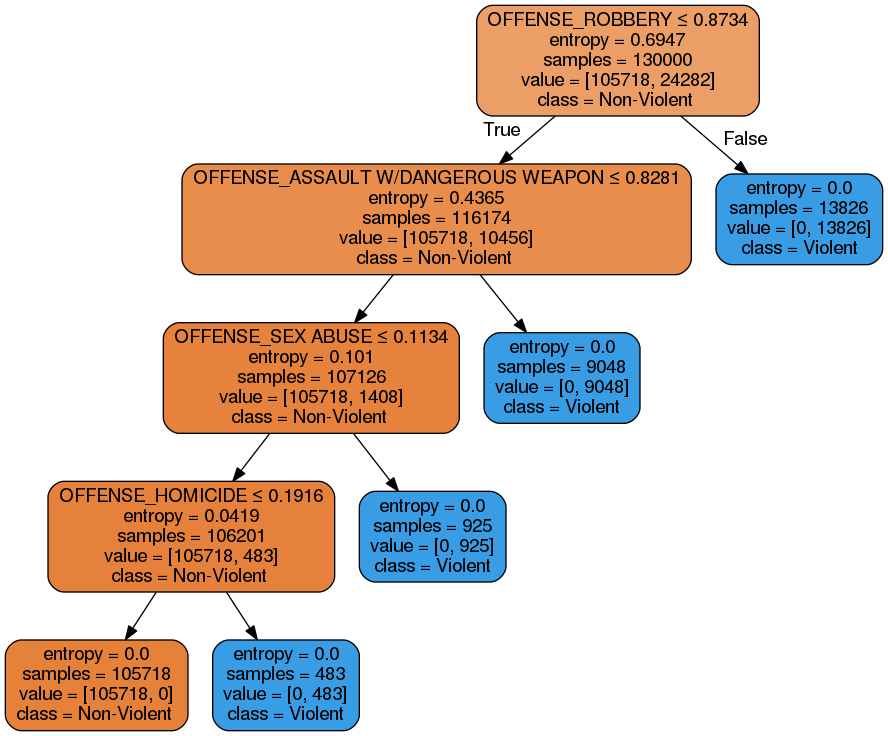

In [375]:
from sklearn import tree
from IPython.display import Image
import pydotplus
draw  = tree.export_graphviz(model_dt, out_file = None, feature_names = features, class_names=classes, filled=True, rounded=True, special_characters=True)
graph= pydotplus.graph_from_dot_data(draw)
Image(graph.create_png())

In [376]:
y_train = y_train.map({'Non-Violent':1, 'Violent':2})
y_train.head()

128336    1
302177    1
308164    2
88067     1
171093    1
Name: crimetype, dtype: int64

In [377]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
regr1 = RandomForestClassifier(max_features=7, random_state=1)
regr1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [378]:
pred = model_dt.predict(x_test)
exp=y_test
print(metrics.confusion_matrix(exp,pred))

[[154742      0]
 [     0  35449]]


# Retry

In [ ]:
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [ ]:
trees.iloc[:,:-1]

In [ ]:
trees.iloc[:,:-1]

In [ ]:
subdata.head()

In [ ]:
import copy
trees= copy.deepcopy(subdata)
trees.drop(["X","REPORT_DAT","NEIGHBORHOOD_CLUSTER","BLOCK","PSA","DISTRICT","START_DATE","END_DATE"], axis = 1,inplace = True)
trees.head()

In [ ]:
trees.SHIFT.unique()
trees.SHIFT = trees.SHIFT.map({'EVENING':1, 'DAY':2, 'MIDNIGHT':3})
trees.head()

In [ ]:
trees.OFFENSE.unique()
trees.OFFENSE = trees.OFFENSE.map({'ROBBERY':1, 'MOTOR VEHICLE THEFT':2, 'BURGLARY':3, 'THEFT/OTHER':4,\
       'HOMICIDE':5, 'ASSAULT W/DANGEROUS WEAPON':6, 'SEX ABUSE':7,
       'THEFT F/AUTO':8, 'ARSON':9})
trees.head()

In [ ]:
trees.METHOD.unique()
trees.METHOD = trees.METHOD.map({'OTHERS':1, 'GUN':2, 'KNIFE':3})
trees.head()

In [ ]:
trees.drop("CCN",inplace=True, axis = 1)
trees.EW.unique()
trees.EW = trees.EW.map({'East':1, 'West':2})
trees.head()

In [ ]:
trees.NS.unique()
trees.NS = trees.NS.map({'North':1, 'South':2})
trees.head()

In [ ]:
trees.quad.unique()
trees.quad = trees.quad.map({'Southeast':1, 'Northeast':2, 'Northwest':3, 'Southwest':4})
trees.head()

In [ ]:
trees.ANC.unique()
trees.ANC = trees.ANC.map({'8A':1, '8E':2, '8D':3, '8C':4, '8B':5, '7B':6, '7E':7, '7F':8, '7D':9, '7C':10, '6B':11,
       '6A':12, '6C':13, '6D':14, '6E':15, '5D':16, '1B':17, '2F':18, '2C':19, '5E':20, '2A':21, '5C':22,
       '5B':23, '5A':24, '1A':25, '4D':26, '4C':27, '4B':28, '4A':29, '3G':30, '1D':31, '3E':32, '3B':33,
       '3F':34, '3C':35, '3D':36, '2B':37, '2D':38, '2E':39, '1C':40})
trees.head()

In [ ]:
import seaborn as sns
sns.pairplot(trees)

In [ ]:
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(trees.iloc[:,:-1],trees.crimetype, test_size=190191, random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
clf = DecisionTreeClassifier(criterion="entropy",max_depth=None, max_leaf_nodes=6, max_features=10,random_state=101)
clf.fit(x_train,y_train)

In [ ]:
?DecisionTreeClassifier

In [ ]:
clf.score(x_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
print(classification_report(trees.crimetype, clf.predict(trees.iloc[:,:-1])))

In [ ]:
from sklearn.model_selection  import train_test_split
trees_hourless = trees.drop("hour", axis = 1)
trees_hourless.head()


In [ ]:
trees_hourless.crimetype.unique()
trees_hourless.crimetype = trees_hourless.crimetype.map({'Violent':1, 'Non-Violent':2})
trees_hourless.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(trees_hourless,trees.hour, test_size=190191, random_state=101)

In [ ]:
?DecisionTreeRegressor

In [ ]:
regr2 = DecisionTreeRegressor(splitter="random",max_depth=None,random_state=101)
regr2.fit(x_train, y_train)
pred = regr2.predict(x_test)

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor

regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr.fit(x_train, y_train)
feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=trees_hourless.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
mean_squared_error(y_test, regr.predict(x_test))